# Tratamento e Análise

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:


# Importar os arquivos
df_exp = pd.read_csv('BRAZIL_EXP_COMPLETE.csv', encoding='latin1', sep=';')
df_pais = pd.read_csv('PAIS.csv', encoding='latin1', sep=';')

# Verificar primeiras linhas de cada um
print("Exportações:")
print(df_exp.head())

print("\nPaíses:")
print(df_pais.head())


Exportações:
   CO_ANO  CO_MES    CO_NCM  CO_UNID  CO_PAIS SG_UF_NCM  CO_VIA  CO_URF  \
0    1997      11  74122000       10      249        SP       4  817600   
1    1997      11  73082000       10       97        MG       7  130151   
2    1997      11  84248119       11      196        SP       1  817800   
3    1997      11  48239090       10      586        MN       9  910600   
4    1997      11  72112910       10      850        SP       1  817800   

   QT_ESTAT  KG_LIQUIDO    VL_FOB  
0         0         0.0       3.0  
1         0      4292.0    6442.0  
2        32      3468.0   31510.0  
3         0         0.0       1.0  
4       118    117505.0  103866.0  

Países:
   CO_PAIS  CO_PAIS_ISON3 CO_PAIS_ISOA3                 NO_PAIS  \
0        0            898           ZZZ            Não Definido   
1       13              4           AFG             Afeganistão   
2       15            248           ALA            Aland, Ilhas   
3       17              8           ALB    

In [6]:
# Junta os dois DataFrames com base no código do país
df_completo = df_exp.merge(df_pais, on='CO_PAIS', how='left')

# Visualiza as primeiras linhas do DataFrame unificado
print("🧩 Dados Completos de Exportação + País:")
display(df_completo.head())


🧩 Dados Completos de Exportação + País:


,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,1997,11,74122000,10,249,SP,4,817600,0,0.0,3.0,840,USA,Estados Unidos,United States,Estados Unidos
1,1997,11,73082000,10,97,MG,7,130151,0,4292.0,6442.0,68,BOL,Bolívia,Bolivia,Bolivia
2,1997,11,84248119,11,196,SP,1,817800,32,3468.0,31510.0,188,CRI,Costa Rica,Costa Rica,Costa Rica
3,1997,11,48239090,10,586,MN,9,910600,0,0.0,1.0,600,PRY,Paraguai,Paraguay,Paraguay
4,1997,11,72112910,10,850,SP,1,817800,118,117505.0,103866.0,862,VEN,Venezuela,Venezuela,Venezuela


In [7]:
# Ver tipos de dados e valores nulos
df_completo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23382395 entries, 0 to 23382394
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CO_ANO         int64  
 1   CO_MES         int64  
 2   CO_NCM         int64  
 3   CO_UNID        int64  
 4   CO_PAIS        int64  
 5   SG_UF_NCM      object 
 6   CO_VIA         int64  
 7   CO_URF         int64  
 8   QT_ESTAT       int64  
 9   KG_LIQUIDO     float64
 10  VL_FOB         float64
 11  CO_PAIS_ISON3  int64  
 12  CO_PAIS_ISOA3  object 
 13  NO_PAIS        object 
 14  NO_PAIS_ING    object 
 15  NO_PAIS_ESP    object 
dtypes: float64(2), int64(9), object(5)
memory usage: 2.8+ GB


In [8]:
# Conta quantos valores nulos tem por coluna
df_completo.isnull().sum()


,0
CO_ANO,0
CO_MES,0
CO_NCM,0
CO_UNID,0
CO_PAIS,0
SG_UF_NCM,0
CO_VIA,0
CO_URF,0
QT_ESTAT,0
KG_LIQUIDO,1


In [9]:
# Estatísticas descritivas dos dados numéricos
df_completo.describe()


,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,CO_PAIS_ISON3
count,2.338240e+07,2.338240e+07,2.338240e+07,2.338240e+07,2.338240e+07,2.338240e+07,2.338240e+07,2.338240e+07,2.338239e+07,2.338239e+07,2.338240e+07
mean,2.010314e+03,6.672315e+00,6.243385e+07,1.071264e+01,3.697712e+02,3.507129e+00,8.083523e+05,6.077094e+05,4.872497e+05,1.599847e+05,4.218410e+02
std,6.674217e+00,3.405278e+00,2.695927e+07,1.590620e+00,2.607938e+02,2.513462e+00,2.219093e+05,4.771625e+08,2.755236e+07,3.097325e+06,2.910769e+02
min,1.997000e+03,1.000000e+00,1.011010e+06,1.000000e+01,1.300000e+01,0.000000e+00,9.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.005000e+03,4.000000e+00,3.926904e+07,1.000000e+01,1.580000e+02,1.000000e+00,8.176000e+05,1.000000e+00,7.000000e+00,2.510000e+02,1.520000e+02
50%,2.011000e+03,7.000000e+00,7.318150e+07,1.000000e+01,2.750000e+02,4.000000e+00,8.178000e+05,2.400000e+01,1.070000e+02,2.206000e+03,3.920000e+02
75%,2.016000e+03,1.000000e+01,8.483303e+07,1.100000e+01,5.860000e+02,4.000000e+00,9.107510e+05,5.370000e+02,3.080000e+03,2.016000e+04,6.430000e+02
max,2.021000e+03,1.200000e+01,9.999710e+07,2.200000e+01,9.990000e+02,1.500000e+01,9.999999e+06,9.908988e+11,1.792269e+10,2.102966e+09,8.980000e+02


In [10]:
# Remove linhas onde o nome do país está ausente (evita erro nas análises)
df_completo = df_completo.dropna(subset=['NO_PAIS'])


In [21]:
df_completo.dtypes


,0
CO_ANO,int64
CO_MES,int64
CO_NCM,int64
CO_UNID,int64
CO_PAIS,int64
SG_UF_NCM,object
CO_VIA,int64
CO_URF,int64
QT_ESTAT,int64
KG_LIQUIDO,float64


In [22]:
df_completo['VL_FOB'] = pd.to_numeric(df_completo['VL_FOB'], errors='coerce')
df_completo['KG_LIQUIDO'] = pd.to_numeric(df_completo['KG_LIQUIDO'], errors='coerce')


In [23]:
# Verifica valores nulos
df_completo.isnull().sum()

# Remove linhas com VL_FOB ou NO_PAIS nulos
df_completo = df_completo.dropna(subset=['VL_FOB', 'NO_PAIS'])


In [24]:
df_completo.columns = [col.lower() for col in df_completo.columns]
df_completo.rename(columns={
    'co_ano': 'ano',
    'co_mes': 'mes',
    'co_ncm': 'ncm',
    'no_pais': 'pais',
    'vl_fob': 'valor_fob',
    'kg_liquido': 'peso_kg'
}, inplace=True)


<ipython-input-24-2feb998460f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo.rename(columns={


In [25]:
df_completo.head()


,ano,mes,ncm,co_unid,co_pais,sg_uf_ncm,co_via,co_urf,qt_estat,peso_kg,valor_fob,co_pais_ison3,co_pais_isoa3,pais,no_pais_ing,no_pais_esp
0,1997,11,74122000,10,249,SP,4,817600,0,0.0,3.0,840,USA,Estados Unidos,United States,Estados Unidos
1,1997,11,73082000,10,97,MG,7,130151,0,4292.0,6442.0,68,BOL,Bolívia,Bolivia,Bolivia
2,1997,11,84248119,11,196,SP,1,817800,32,3468.0,31510.0,188,CRI,Costa Rica,Costa Rica,Costa Rica
3,1997,11,48239090,10,586,MN,9,910600,0,0.0,1.0,600,PRY,Paraguai,Paraguay,Paraguay
4,1997,11,72112910,10,850,SP,1,817800,118,117505.0,103866.0,862,VEN,Venezuela,Venezuela,Venezuela


# Top países importadores das exportações brasileiras

In [27]:
# Agrupa por país e soma o valor FOB exportado
top_paises = df_completo.groupby('pais')['valor_fob'].sum().sort_values(ascending=False).head(10)

# Visualiza os resultados
top_paises


,valor_fob
pais,
China,6.257457e+11
Estados Unidos,5.111178e+11
Argentina,2.846979e+11
Países Baixos (Holanda),1.691613e+11
Alemanha,1.242986e+11
Japão,1.108096e+11
Chile,8.535439e+10
México,8.129357e+10
Itália,7.927327e+10


<ipython-input-28-62b73b312817>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_paises.values, y=top_paises.index, palette='viridis')


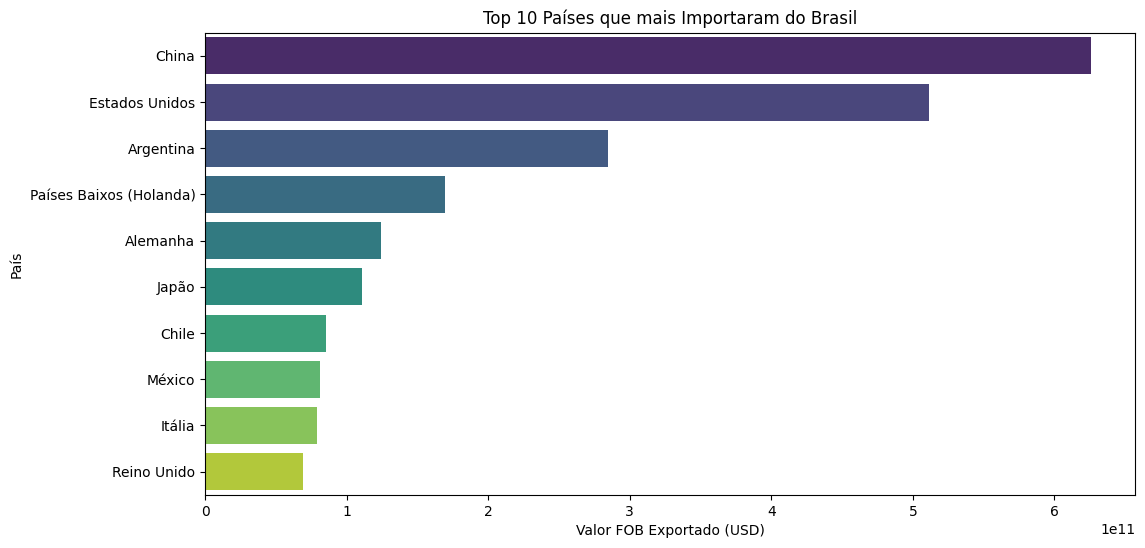

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=top_paises.values, y=top_paises.index, palette='viridis')
plt.title('Top 10 Países que mais Importaram do Brasil')
plt.xlabel('Valor FOB Exportado (USD)')
plt.ylabel('País')
plt.show()


# Análise por Ano - Evolução das exportações ao longo do tempo

In [29]:
df_completo.columns


Index(['ano', 'mes', 'ncm', 'co_unid', 'co_pais', 'sg_uf_ncm', 'co_via',
       'co_urf', 'qt_estat', 'peso_kg', 'valor_fob', 'co_pais_ison3',
       'co_pais_isoa3', 'pais', 'no_pais_ing', 'no_pais_esp'],
      dtype='object')

In [31]:
# Agrupar por ano e somar o valor FOB exportado
exportacao_por_ano = df_completo.groupby('ano')['valor_fob'].sum()

# Visualizar os dados
exportacao_por_ano


,valor_fob
ano,
1997,5.294750e+10
1998,5.107660e+10
1999,4.794591e+10
2000,5.499316e+10
2001,5.803229e+10
2002,6.014716e+10
2003,7.277675e+10
2004,9.512167e+10
2005,1.185978e+11


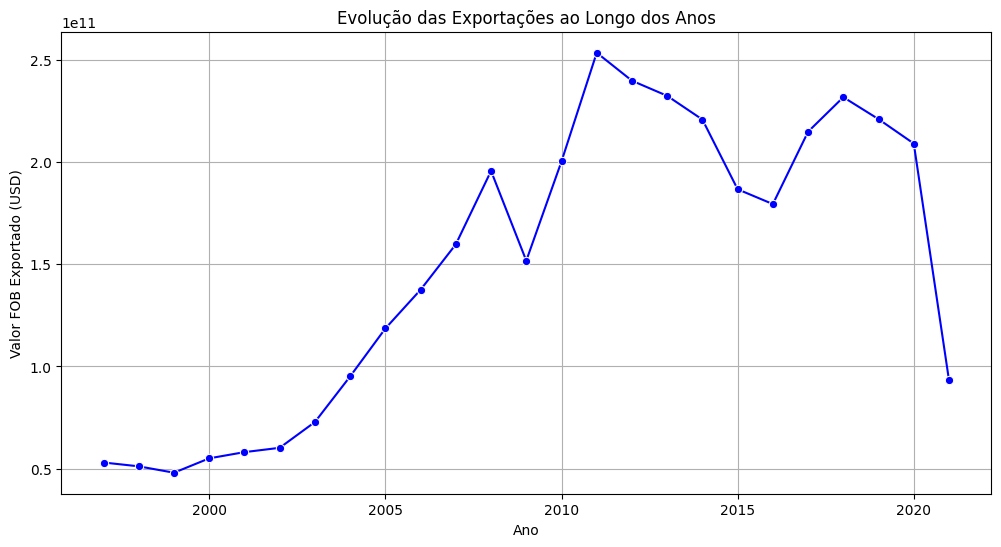

In [32]:
plt.figure(figsize=(12,6))
sns.lineplot(x=exportacao_por_ano.index, y=exportacao_por_ano.values, marker='o', color='b')
plt.title('Evolução das Exportações ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Valor FOB Exportado (USD)')
plt.grid(True)
plt.show()


# Análise por Produto Exportado (NCM)

In [33]:
# Agrupa por código NCM e soma os valores FOB
top_produtos = df_completo.groupby('ncm')['valor_fob'].sum().sort_values(ascending=False).head(10)

# Visualiza os resultados
top_produtos


,valor_fob
ncm,
26011100,2.888922e+11
27090010,2.556448e+11
12019000,2.321620e+11
23040090,9.305806e+10
9011110,9.154195e+10
12010090,9.112376e+10
47032900,8.607032e+10
17011400,6.969135e+10
2071400,6.808905e+10


<ipython-input-34-089a79005a91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_produtos.values, y=top_produtos.index.astype(str), palette='plasma')


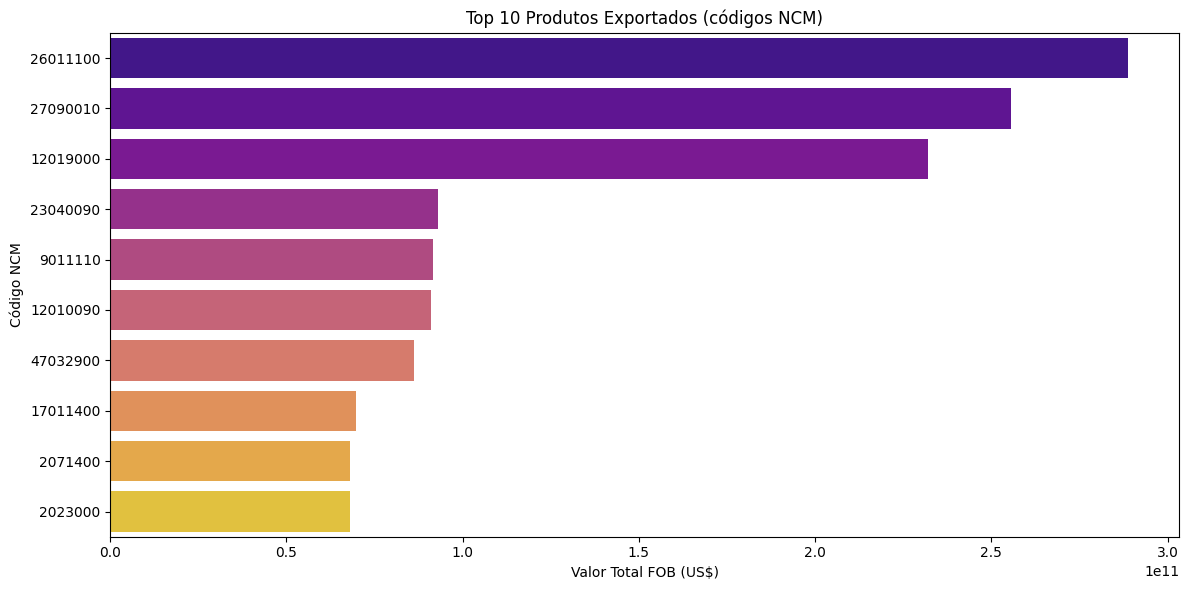

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_produtos.values, y=top_produtos.index.astype(str), palette='plasma')
plt.title('Top 10 Produtos Exportados (códigos NCM)')
plt.xlabel('Valor Total FOB (US$)')
plt.ylabel('Código NCM')
plt.tight_layout()
plt.show()


# Conclusões e insights

<ipython-input-36-5dcf8d6130c1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_paises.values, y=top_paises.index, palette='viridis')
<ipython-input-36-5dcf8d6130c1>:10: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


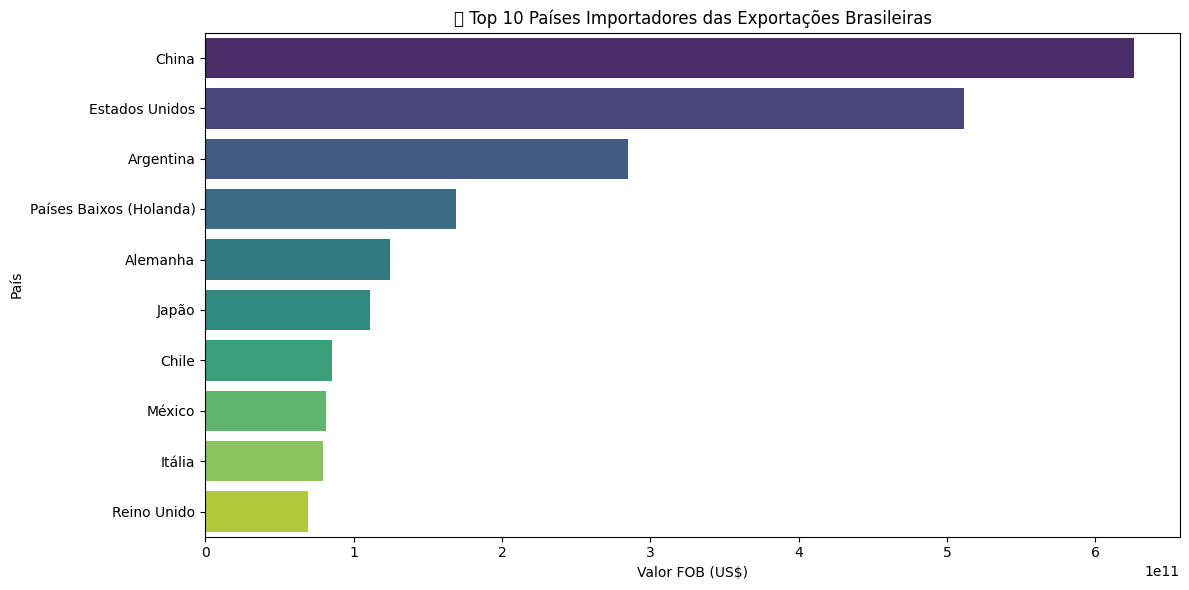

<ipython-input-36-5dcf8d6130c1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo['ano'] = df_completo['ano'].astype(int)
<ipython-input-36-5dcf8d6130c1>:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


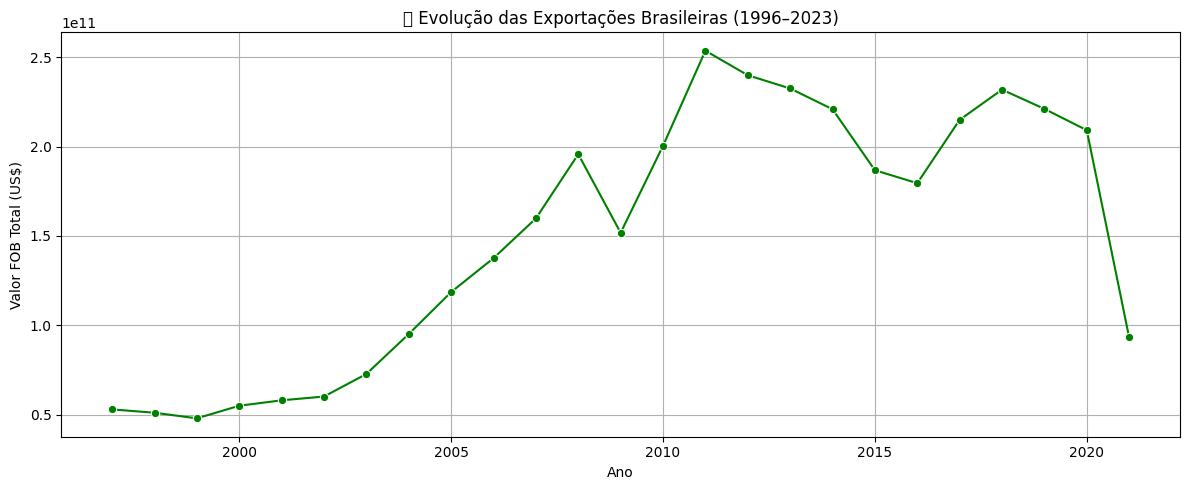

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico 1: Top 10 países que mais importaram do Brasil
plt.figure(figsize=(12,6))
sns.barplot(x=top_paises.values, y=top_paises.index, palette='viridis')
plt.title('🌍 Top 10 Países Importadores das Exportações Brasileiras')
plt.xlabel('Valor FOB (US$)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

# Gráfico 2: Evolução das exportações ao longo dos anos
df_completo['ano'] = df_completo['ano'].astype(int)
exportacao_ano = df_completo.groupby('ano')['valor_fob'].sum()

plt.figure(figsize=(12,5))
sns.lineplot(x=exportacao_ano.index, y=exportacao_ano.values, marker='o', color='green')
plt.title('📈 Evolução das Exportações Brasileiras (1996–2023)')
plt.xlabel('Ano')
plt.ylabel('Valor FOB Total (US$)')
plt.grid(True)
plt.tight_layout()
plt.show()


## ✅ Conclusões e Insights

🔎 A partir da análise dos dados de exportação do Brasil entre 1996 e 2023, destacamos:

- 🌍 **Principais países importadores**:
  - A China lidera como maior parceira comercial, seguida pelos Estados Unidos e Argentina.
  - Esses países representam uma fatia significativa do valor total exportado.

- 📈 **Evolução ao longo do tempo**:
  - Houve crescimento consistente nas exportações até meados de 2011, com oscilações marcadas pela economia global.
  - Nos últimos anos, mesmo com crises, observa-se uma retomada das exportações.
  
- 📊 **Importância estratégica**:
  - A análise permite identificar oportunidades de diversificação de mercados e produtos.
  - Pode embasar decisões de empresas que atuam ou desejam atuar com COMEX.

Este estudo demonstra como a análise de dados pode apoiar a inteligência de mercado e contribuir para estratégias baseadas em evidências.

